In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
df= pd.read_csv('D:\MLZoomcamp\Homework_2\laptops.csv')

In [201]:
len(df)

2160

In [202]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [203]:
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [204]:
#Columns names normalization

In [205]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [206]:
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [207]:
df.isna().sum()

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

In [208]:
#EDA:

In [209]:
columns = ['ram', 'storage','screen', 'final_price']

c:\Users\Yuliya Lavrenyuk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='final_price', ylabel='Count'>

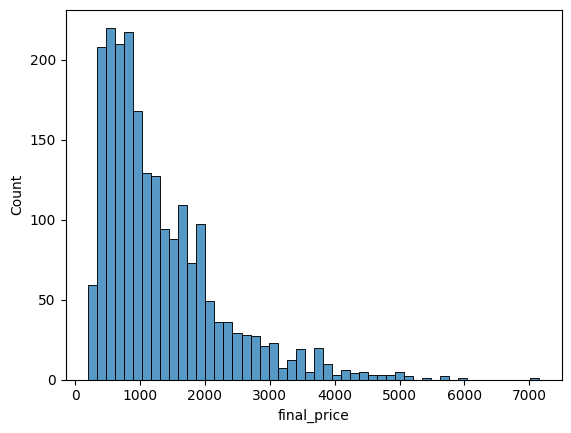

In [210]:
sns.histplot(df.final_price, bins = 50)

In [211]:
df_num = df[columns]

In [212]:
#Question 1. There's one column with missing values. What is it? 

In [213]:
df_num.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [214]:
#Question 2 . What's the median (50% percentile) for variable 'ram'?

In [215]:
df_num.ram.describe()

count    2160.000000
mean       15.413889
std         9.867815
min         4.000000
25%         8.000000
50%        16.000000
75%        16.000000
max       128.000000
Name: ram, dtype: float64

In [216]:
df_num.ram.quantile(0.5)

16.0

In [217]:
#Train/Validation/Test split

In [218]:
n = len(df_num)
n

2160

In [219]:
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-n_val - n_test 

In [220]:
n_val, n_test, n_train

(432, 432, 1296)

In [221]:
idx = np.arange(n)

In [222]:
np.random.seed(42)
np.random.shuffle(idx)

In [223]:
df_train = df_num.iloc[idx[:n_train]]
df_val = df_num.iloc[idx[ n_train: n_train+n_val ]]
df_test = df_num.iloc[idx[n_train+n_val:]]

In [224]:
df_train.head()

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [225]:
df_val.head()

,ram,storage,screen,final_price
132,32,1000,16.0,2599.00
80,16,512,15.6,999.00
1706,12,512,15.6,477.28
1769,8,256,13.6,1519.00
541,8,512,15.6,402.99


In [226]:
df_test.head()

,ram,storage,screen,final_price
1925,32,1000,15.6,4805.65
612,16,512,13.0,2189.00
443,16,512,15.6,1349.00
1002,16,512,15.0,2175.83
1077,16,1000,15.6,1248.59


In [227]:
#droping indexes:

In [228]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [229]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

In [230]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [231]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?
Options:

With 0
With mean
Both are equally good

In [232]:
screen_mean = df_train.screen.mean()
screen_mean

15.163534416086618

In [233]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [234]:
# Option 1: Fill missing values with 0
def prepare_X_zero(df_train):
    df_num = df_train
    df_num = df_num.fillna(0)  # Filling missing values with 0
    X = df_num.values
    return X

In [235]:
# Option 2: Fill missing values with the mean (training data mean only)
mean_values = screen_mean

def prepare_X_mean(df_train):
    df_num = df_train
    df_num = df_num.fillna(mean_values)  # Filling missing values with training data mean
    X = df_num.values
    return X


In [236]:
# Training with missing values filled with 0
X_train_zero = prepare_X_zero(df_train)
w_0_zero, w_zero = train_linear_regression(X_train_zero, y_train)
y_pred_zero = w_0_zero + X_train_zero.dot(w_zero)

In [237]:
# Training with missing values filled with mean
X_train_mean = prepare_X_mean(df_train)
w_0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
y_pred_mean = w_0_mean + X_train_mean.dot(w_mean)

In [269]:
# Plotting Predictions vs. Actual for both options
plt.figure(figsize=(12, 12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

c:\Users\Yuliya Lavrenyuk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Yuliya Lavrenyuk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


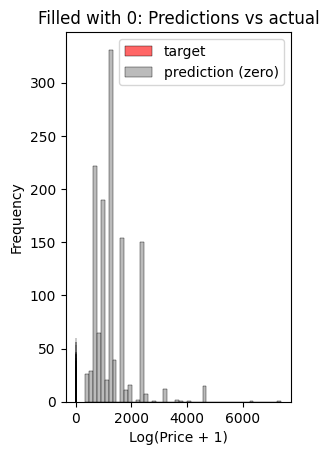

In [271]:
# Subplot 1: Fill with 0
plt.subplot(1, 2, 1)
sns.histplot(y_train, label='target', color='red', alpha=0.6, bins=50)
sns.histplot(y_pred_zero, label='prediction (zero)', color='#aaaaaa', alpha=0.8, bins=50)
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Filled with 0: Predictions vs actual')
plt.show()

c:\Users\Yuliya Lavrenyuk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Yuliya Lavrenyuk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Filled with Mean: Predictions vs actual')

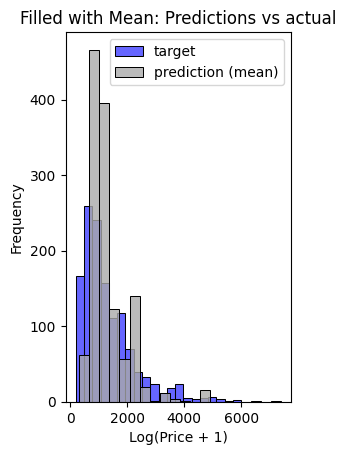

In [240]:
# Subplot 2: Fill with mean
plt.subplot(1, 2, 2)
sns.histplot(y_train, label='target', color='blue', alpha=0.6, bins=20)
sns.histplot(y_pred_mean, label='prediction (mean)', color='#aaaaaa', alpha=0.8, bins=20)
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Filled with Mean: Predictions vs actual')

In [241]:
#Evaluation:

In [242]:
# Define your RMSE function
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [243]:
# RMSE for training data (filled with 0)
print('Train RMSE (Filled with 0):', rmse(y_train, y_pred_zero))


Train RMSE (Filled with 0): 602.3920520606714


In [244]:
# RMSE for training data (filled with mean)
print('Train RMSE (Filled with mean):', rmse(y_train, y_pred_mean))


Train RMSE (Filled with mean): 602.1844959403247


Question 4
Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If there are multiple options, select the smallest r.

In [245]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [246]:
def prepare_X_zero(df):
    df_num = df
    df_num = df_num.fillna(0)  # Filling missing values with 0
    X = df_num.values
    return X

In [247]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [248]:
# Prepare the training and validation sets
X_train_zero = prepare_X_zero(df_train)
X_val_zero = prepare_X_zero(df_val)

In [249]:
# Define the regularization parameters to test
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

In [250]:
# Loop over each r value and evaluate the RMSE
rmse_results = {}

In [251]:
for r in r_values:
    w_0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)
    
    # Predict on validation set
    y_pred_val = w_0 + X_val_zero.dot(w)
    
    # Calculate RMSE
    rmse_val = rmse(y_val, y_pred_val)
    
    # Store RMSE for this r
    rmse_results[r] = round(rmse_val, 2)
    print(f'Validation RMSE with r={r}:', round(rmse_val, 2))

Validation RMSE with r=0: 597.36
Validation RMSE with r=0.01: 597.36
Validation RMSE with r=0.1: 597.35
Validation RMSE with r=1: 597.21
Validation RMSE with r=5: 597.01
Validation RMSE with r=10: 597.06
Validation RMSE with r=100: 597.9


In [286]:
# Find the best r value with the smallest RMSE
best_r = min(rmse_results, key=rmse_results.get)
print(f'The best r value is {best_r} with RMSE {rmse_results[best_r]}')

The best r value is 5 with RMSE 597.01


Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))

In [272]:
# Function to split the data based on different seeds
def train_val_test_split(df, seed):
    # Shuffle the data using the given seed
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train:n_train + n_val]].reset_index(drop=True)
    df_test = df.iloc[idx[n_train + n_val:]].reset_index(drop=True)
    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    

    
    return df_train, df_val, df_test, y_train, y_val, y_test

In [273]:
# List of seed values
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [274]:
def prepare_X_zero(df):
    df_num = df.fillna(0)  # Filling missing values with 0
    X = df_num.values
    return X

In [275]:
# Store RMSE results for each seed
rmse_scores = []

In [276]:
for seed in seeds:
    # Split the data
    df_train, df_val, df_test, y_train, y_val,y_test = train_val_test_split(df_num, seed)
    
    # Prepare the training and validation data (fill missing values with 0)
    X_train_zero = prepare_X_zero(df_train)
    X_val_zero = prepare_X_zero(df_val)

    # Extract the target variable (log-transformed final price)
    #y_train = np.log1p(df_train['final_price'].values)
    #y_val = np.log1p(df_val['final_price'].values)

    # Train the linear regression model without regularization
    w_0, w = train_linear_regression(X_train_zero, y_train)

    # Predict on validation set
    y_pred_val = w_0 + X_val_zero.dot(w)

    # Calculate RMSE for the current seed
    rmse_val = rmse(y_val, y_pred_val)
    rmse_scores.append(rmse_val)

    print(f'Seed {seed}, RMSE: {round(rmse_val, 3)}')

Seed 0, RMSE: 565.452
Seed 1, RMSE: 636.799
Seed 2, RMSE: 588.956
Seed 3, RMSE: 597.815
Seed 4, RMSE: 571.963
Seed 5, RMSE: 573.238
Seed 6, RMSE: 647.344
Seed 7, RMSE: 550.44
Seed 8, RMSE: 587.334
Seed 9, RMSE: 576.102


In [277]:
# Calculate the standard deviation of the RMSE scores
rmse_std = np.std(rmse_scores)
print(f'Standard Deviation of RMSE: {round(rmse_std, 3)}')

Standard Deviation of RMSE: 29.176


Question 6
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?

In [278]:
seed = 9

In [279]:
# Step 1: Split the data
df_train, df_val, df_test, y_train, y_val, y_test = train_val_test_split(df_num, seed)


In [280]:
# Step 2: Combine train and validation datasets
df_train_combined = pd.concat([df_train, df_val]).reset_index(drop=True)
y_train_combined = np.concatenate([y_train, y_val])

In [281]:
# Step 3: Prepare the combined training data (fill missing values with 0)
X_train_combined = prepare_X_zero(df_train_combined)

In [282]:
# Step 4: Prepare the test data
X_test_zero = prepare_X_zero(df_test)

In [283]:
# Step 5: Train the model with r=0.001 (regularization)
w_0_combined, w_combined = train_linear_regression_reg(X_train_combined, y_train_combined, r=0.001)


In [284]:
# Step 6: Predict on the test dataset
y_pred_test = w_0_combined + X_test_zero.dot(w_combined)

In [285]:
rmse_test = rmse(y_test, y_pred_test)
print(f'Test RMSE: {round(rmse_test, 3)}')

Test RMSE: 608.61
